
![](https://i.imgur.com/MUGUenE.png)



![](https://i.imgur.com/YDgBe3g.png)


<div style = "color: Black; display: fill;
              border-radius: 5px;
              background-color: #EAE509;
              font-size: 100%;
              font-family: Verdana">
    <p style = "padding: 7px; color: Black;">
    <ul> 📌 <b>Most Runs</b> - Most Runs in the Tournament<br>
         📌 <b>Most Wickets</b> - Most Wickets in the Tournament<br>
         📌 <b>Best Bowling Economy (Innings)</b> - Best Bowling Economy in an Innings<br>
         📌 <b>Best Bowling Strike Rate (Innings)</b> - Best Bowling Strike Rate in an Innings<br>
         📌 <b>Fastest Centuries</b> - Fastest Centuries in the Tournament<br>
         📌 <b>Fastest Fifties</b> - Fastest Fifties in the Tournament<br>
         📌 <b>Most Runs Conceded (Innings)</b> - Most Runs Conceded in an Innings<br>
         📌 <b>Most Dot Balls (Innings)</b> - Most Dot Balls in an Innings<br>
         📌 <b>Most Runs (Over)</b> - Most Runs in an Over<br>
         📌 <b>Most Sixes (Innings)</b> - Most Sixes hit in an Innings<br>
         📌 <b>Most Fours (Innings)</b> - Most Fours hit in an Innings<br><br>
    <p style = "padding: 3px; color: Black;">


![](https://i.imgur.com/PXPGUwD.png)



![](https://i.imgur.com/BiP8Vkx.png)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image
import squarify
from wordcloud import WordCloud, STOPWORDS
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_most_runs = pd.read_csv("C:\\Users\\ANIL YADAV\Downloads\Most Runs - 2022.csv")
df_most_runs.head(10)

,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
5,6,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22
6,7,Suryakumar Yadav,16,15,3,480,79*,40.00,331,145.01,0,4,61,11
7,8,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8
8,9,Virat Kohli,15,15,4,466,90*,42.36,384,121.35,0,3,23,11
9,10,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23



![](https://i.imgur.com/bLJ2eW4.png)


In [3]:
df_most_runs = df_most_runs.drop("POS", 1)


![](https://i.imgur.com/PuUF8wf.png)


In [4]:
print("Shape of the Dataset:", df_most_runs.shape)

Shape of the Dataset: (133, 13)



![](https://i.imgur.com/Jp8eZtk.png)


In [5]:
df_most_runs.columns

Index(['Player', 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Avg', 'BF', 'SR', '100',
       '50', '4s', '6s'],
      dtype='object')


![](https://i.imgur.com/66TLyXO.png)


In [6]:
df_most_runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  133 non-null    object 
 1   Mat     133 non-null    int64  
 2   Inns    133 non-null    int64  
 3   NO      133 non-null    int64  
 4   Runs    133 non-null    int64  
 5   HS      133 non-null    object 
 6   Avg     133 non-null    float64
 7   BF      133 non-null    int64  
 8   SR      133 non-null    float64
 9   100     133 non-null    int64  
 10  50      133 non-null    int64  
 11  4s      133 non-null    int64  
 12  6s      133 non-null    int64  
dtypes: float64(2), int64(9), object(2)
memory usage: 13.6+ KB


In [7]:
df_most_runs.describe()

,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
count,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000,133.000000
mean,9.631579,6.631579,1.616541,139.157895,19.366241,105.714286,107.364737,0.037594,0.827068,11.894737,5.518797
std,4.893523,5.030925,1.550766,167.293103,18.053343,122.253870,44.584031,0.227170,1.351269,15.521375,7.393283
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,2.000000,0.000000,10.000000,6.000000,12.000000,88.750000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,5.000000,1.000000,59.000000,15.000000,53.000000,116.840000,0.000000,0.000000,5.000000,2.000000
75%,14.000000,11.000000,2.000000,232.000000,29.900000,169.000000,137.500000,0.000000,1.000000,20.000000,9.000000
max,17.000000,17.000000,7.000000,670.000000,101.000000,518.000000,191.420000,2.000000,5.000000,67.000000,30.000000






![](https://i.imgur.com/svEl4RH.png)

In [8]:
df_most_runs.isnull().sum()

Player    0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Avg       0
BF        0
SR        0
100       0
50        0
4s        0
6s        0
dtype: int64

![](https://i.imgur.com/xP1Xpmb.png)





In [9]:
df_most_runs.duplicated().sum()

0

![](https://i.imgur.com/RQIF1Nv.png)







In [10]:
df_most_runs["100"].unique()

array([1, 2, 0])

In [11]:
df_most_runs["50"].unique()

array([5, 4, 3, 2, 1, 0])


![](https://i.imgur.com/VKMf5Ca.png)


In [12]:
print("Maximum number of Matches played by an individual player in a season:", df_most_runs["Mat"].max())

Maximum number of Matches played by an individual player in a season: 17



![](https://i.imgur.com/oWxi6Xx.png)


In [13]:
print("Highest Average of a player in a season:", df_most_runs["Avg"].max())

Highest Average of a player in a season: 101.0



![](https://i.imgur.com/hdOGsA1.png)


In [14]:
print("Avarage number of Matches played by a player in a season:", df_most_runs["Mat"].mean())

Avarage number of Matches played by a player in a season: 9.631578947368421



![](https://i.imgur.com/BglPKGd.png)


In [15]:
df_most_runs.corr()

,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s
Mat,1.000000,0.728358,0.555261,0.565237,0.306128,0.555102,0.371328,0.128405,0.455437,0.522628,0.523367
Inns,0.728358,1.000000,0.464356,0.895914,0.585148,0.889753,0.581468,0.224328,0.755027,0.846749,0.810922
NO,0.555261,0.464356,1.000000,0.308747,0.429888,0.271021,0.415060,0.019726,0.174184,0.204779,0.391472
Runs,0.565237,0.895914,0.308747,1.000000,0.687475,0.989948,0.517678,0.382577,0.912264,0.959576,0.861166
Avg,0.306128,0.585148,0.429888,0.687475,1.000000,0.664173,0.591306,0.233726,0.638326,0.623643,0.646224
BF,0.555102,0.889753,0.271021,0.989948,0.664173,1.000000,0.474226,0.358550,0.900547,0.955994,0.810916
SR,0.371328,0.581468,0.415060,0.517678,0.591306,0.474226,1.000000,0.135331,0.406029,0.465132,0.566317
100,0.128405,0.224328,0.019726,0.382577,0.233726,0.358550,0.135331,1.000000,0.292812,0.456622,0.186767
50,0.455437,0.755027,0.174184,0.912264,0.638326,0.900547,0.406029,0.292812,1.000000,0.892025,0.757501
4s,0.522628,0.846749,0.204779,0.959576,0.623643,0.955994,0.465132,0.456622,0.892025,1.000000,0.731094



![](https://i.imgur.com/rsjJLXr.png)


In [16]:
df_most_runs[(df_most_runs["Avg"] > 50) & (df_most_runs["SR"] > 120)]["Player"]

0            KL Rahul
4        Ishan Kishan
31     Kieron Pollard
36    Wriddhiman Saha
37    Ruturaj Gaikwad
57       Deepak Hooda
60         Tom Curran
Name: Player, dtype: object


![](https://i.imgur.com/Es97Q7m.png)


In [17]:
df_most_runs[(df_most_runs["Avg"] > 40) & (df_most_runs["BF"] > 100)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
8,Virat Kohli,15,15,4,466,90*,42.36,384,121.35,0,3,23,11
9,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23
10,Faf du Plessis,13,13,2,449,87*,40.81,319,140.75,0,4,42,14
14,Eoin Morgan,14,14,4,418,68*,41.80,302,138.41,0,1,32,24
24,Kane Williamson,12,11,4,317,67,45.28,237,133.75,0,3,26,10
27,Chris Gayle,7,7,0,288,99,41.14,210,137.14,0,3,15,23
28,Ben Stokes,8,8,1,285,107*,40.71,200,142.50,1,1,36,7



![](https://i.imgur.com/XihkROW.png)


In [18]:
df_most_runs[(df_most_runs["Runs"] > 300) & (df_most_runs["Avg"] > 45) & (df_most_runs["SR"] > 130)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
9,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23
24,Kane Williamson,12,11,4,317,67,45.28,237,133.75,0,3,26,10



![](https://i.imgur.com/pQnC1YQ.png)


In [19]:
df_most_runs[(df_most_runs["100"]) > 0]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
13,Mayank Agarwal,11,11,0,424,106,38.54,271,156.45,1,2,44,15
28,Ben Stokes,8,8,1,285,107*,40.71,200,142.50,1,1,36,7



![](https://i.imgur.com/pSuOl2e.png)


In [20]:
df_most_runs[(df_most_runs["50"]) > 3]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
5,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22
6,Suryakumar Yadav,16,15,3,480,79*,40.00,331,145.01,0,4,61,11
7,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8
9,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23
10,Faf du Plessis,13,13,2,449,87*,40.81,319,140.75,0,4,42,14



![](https://i.imgur.com/NLM5yci.png)


In [21]:
df_most_runs[(df_most_runs["4s"] > 45) & (df_most_runs["6s"] > 10)]

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
5,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22
6,Suryakumar Yadav,16,15,3,480,79*,40.00,331,145.01,0,4,61,11



![](https://i.imgur.com/l6RCliv.png)


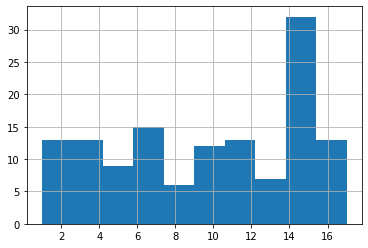

In [22]:
df_most_runs["Mat"].hist();


![](https://i.imgur.com/cYmVekY.png)


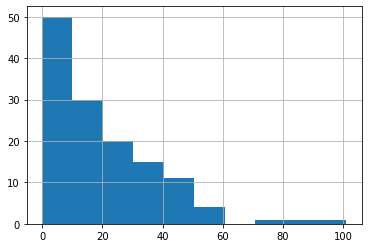

In [23]:
df_most_runs["Avg"].hist();


![](https://i.imgur.com/vOa4Wqw.png)


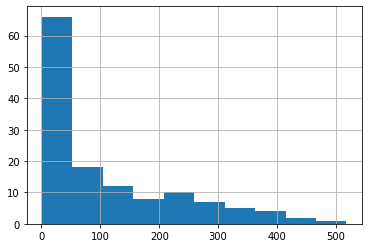

In [24]:
df_most_runs["BF"].hist();


![](https://i.imgur.com/7IqTI1L.png)


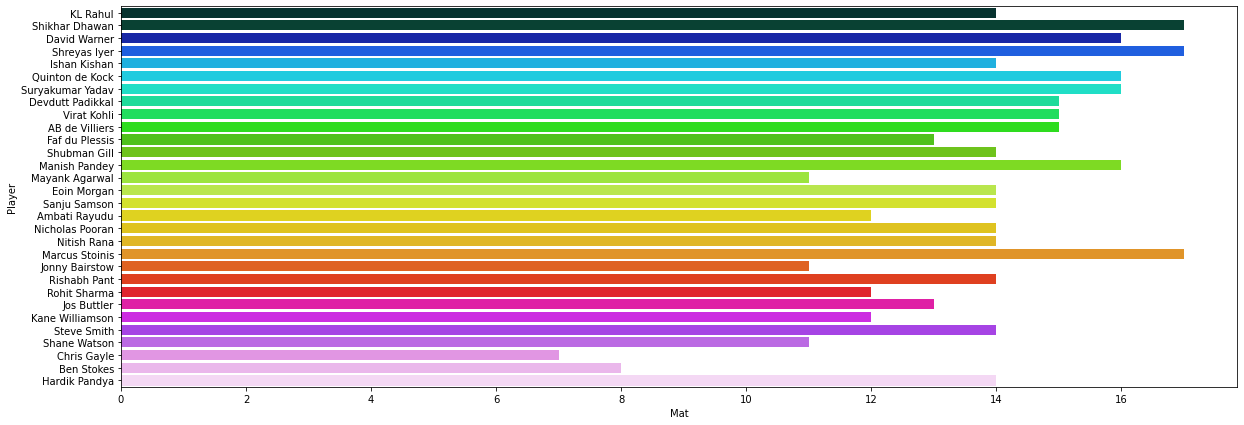

In [25]:
df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['Mat'], ascending = False)
plt.figure(figsize = (20, 7))
sns.barplot(x = df_most_runs["Mat"], y = df_most_runs["Player"][:30], palette = "gist_ncar");


![](https://i.imgur.com/j6wk3ZO.png)


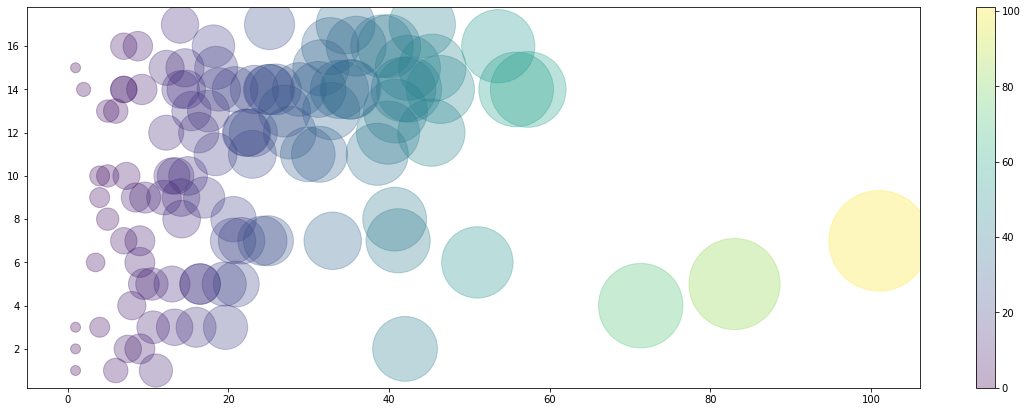

In [26]:
x = df_most_runs["Avg"]
y = df_most_runs["Mat"]
colors = df_most_runs["Avg"]
sizes = 100 * df_most_runs["Avg"]

plt.figure(figsize = (20, 7))
plt.scatter(x,
            y,
            c = colors,
            s = sizes,
            alpha = 0.3,
            cmap = 'viridis')
plt.colorbar();


![](https://i.imgur.com/sUgCnlk.png)


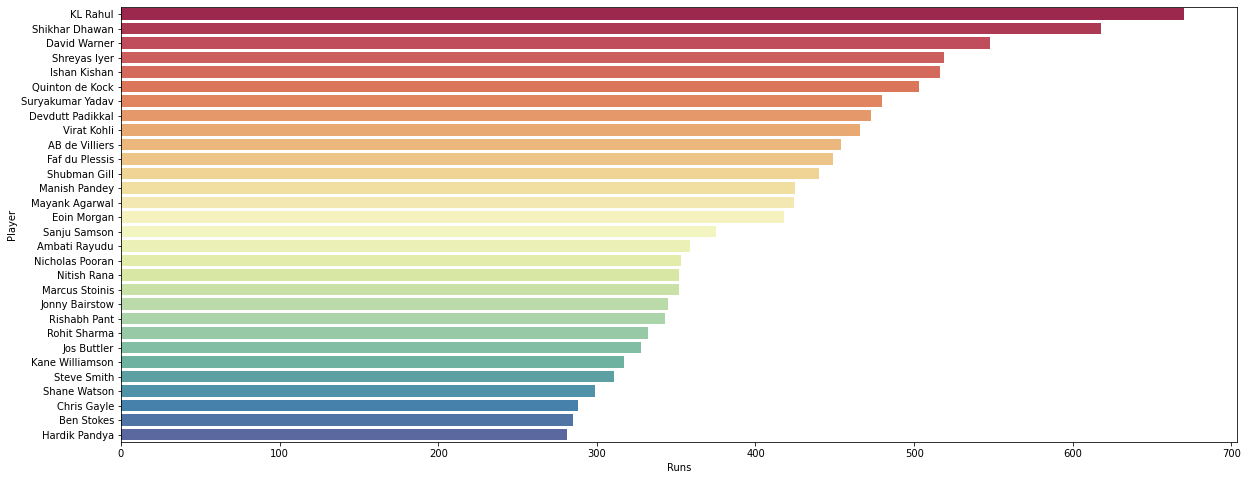

In [27]:
df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['Runs'],
                                                        ascending = False)
plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs["Runs"],
            y = df_most_runs["Player"][:30],
            palette = "Spectral");


![](https://i.imgur.com/644DBas.png)


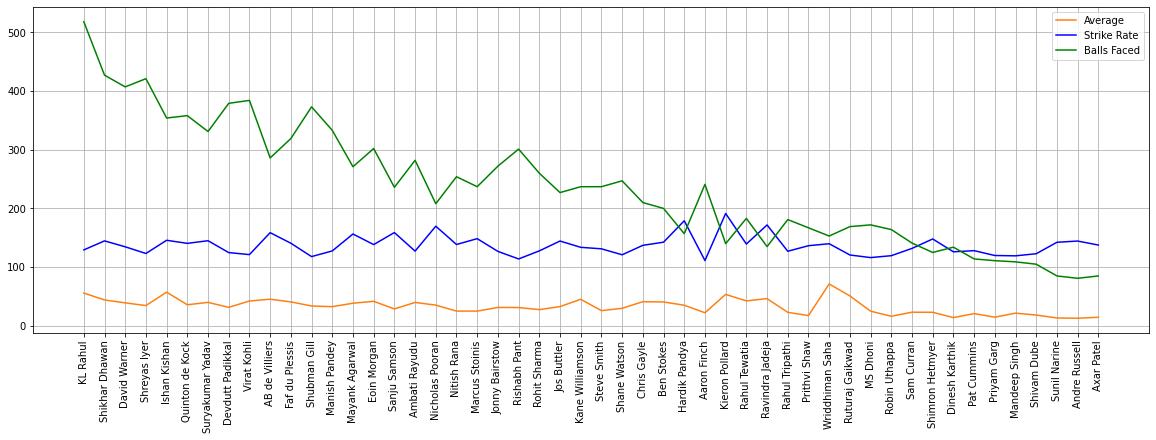

In [28]:
plt.figure(figsize = (20, 6))
plt.plot(df_most_runs["Player"][:50],
         df_most_runs["Avg"][:50],
         color = 'tab:orange')

plt.plot(df_most_runs["Player"][:50],
         df_most_runs["SR"][:50],
         color = 'b')

plt.plot(df_most_runs["Player"][:50],
         df_most_runs["BF"][:50],
         color = 'g')

plt.legend(["Average", "Strike Rate", "Balls Faced"], loc ="upper right")
plt.grid()
plt.xticks(rotation = 90)
plt.show()


![](https://i.imgur.com/Ou62n9d.png)


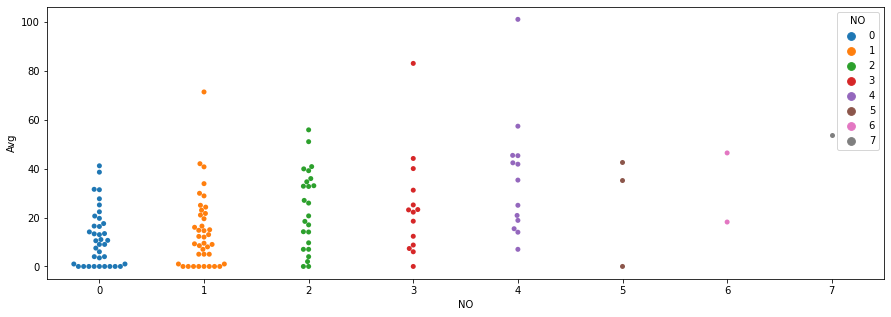

In [29]:
plt.figure(figsize = (15, 5))
sns.swarmplot(df_most_runs["NO"], df_most_runs["Avg"], hue = df_most_runs["NO"]);


![](https://i.imgur.com/sDaBirk.png)


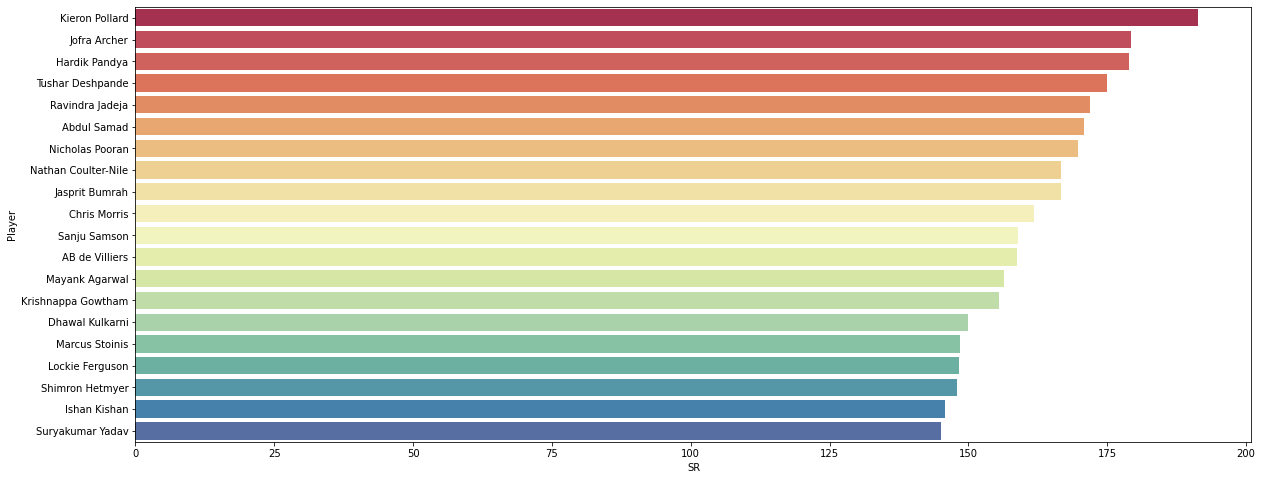

In [30]:
df_most_runs_SR = df_most_runs.loc[:, ["Player", "SR"]]
df_most_runs_SR = df_most_runs_SR.sort_values(by = ['SR'], ascending = False)

df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['SR'], ascending = False)
plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs_SR["SR"], y = df_most_runs_SR["Player"][:20], palette = "Spectral");


![](https://i.imgur.com/2G7eb1i.png)


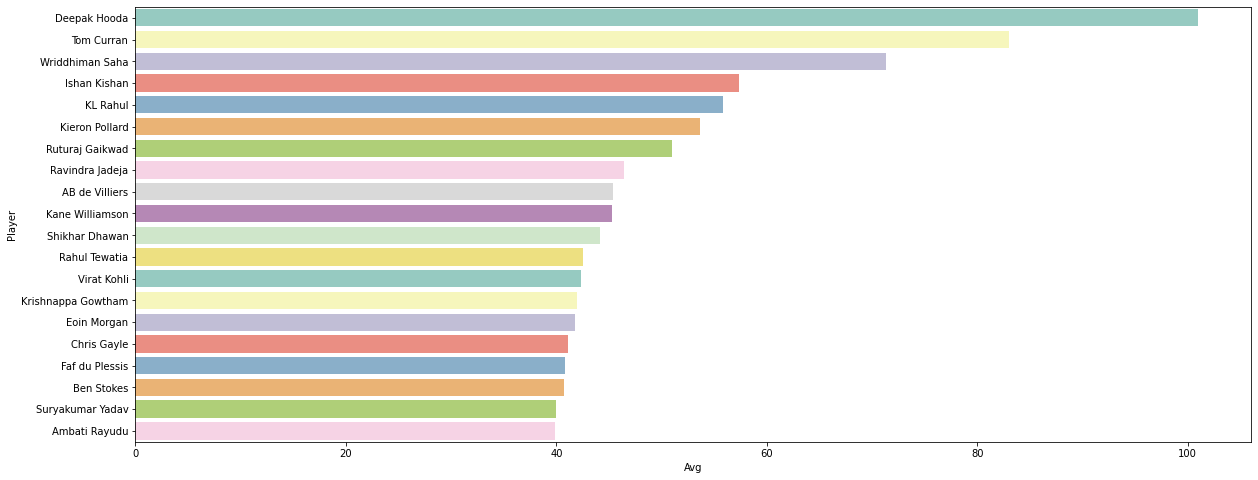

In [31]:
df_most_runs_Avg = df_most_runs.loc[:, ["Player", "Avg"]]
df_most_runs_Avg = df_most_runs_Avg.sort_values(by = ['Avg'], ascending = False)

df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['Avg'], ascending = False)
plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs_Avg["Avg"], y = df_most_runs_Avg["Player"][:20], palette = "Set3");


![](https://i.imgur.com/dq362b9.png)


In [32]:
df_most_runs_HS = df_most_runs["HS"].str.replace("*", "", regex = True)
df_most_runs.HS = df_most_runs_HS
df_most_runs.HS = pd.to_numeric(df_most_runs.HS, errors = "coerce")
df_most_runs.head()

,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14
3,Shreyas Iyer,17,17,2,519,88,34.60,421,123.27,0,3,40,16
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30



![](https://i.imgur.com/sW5BpZk.png)


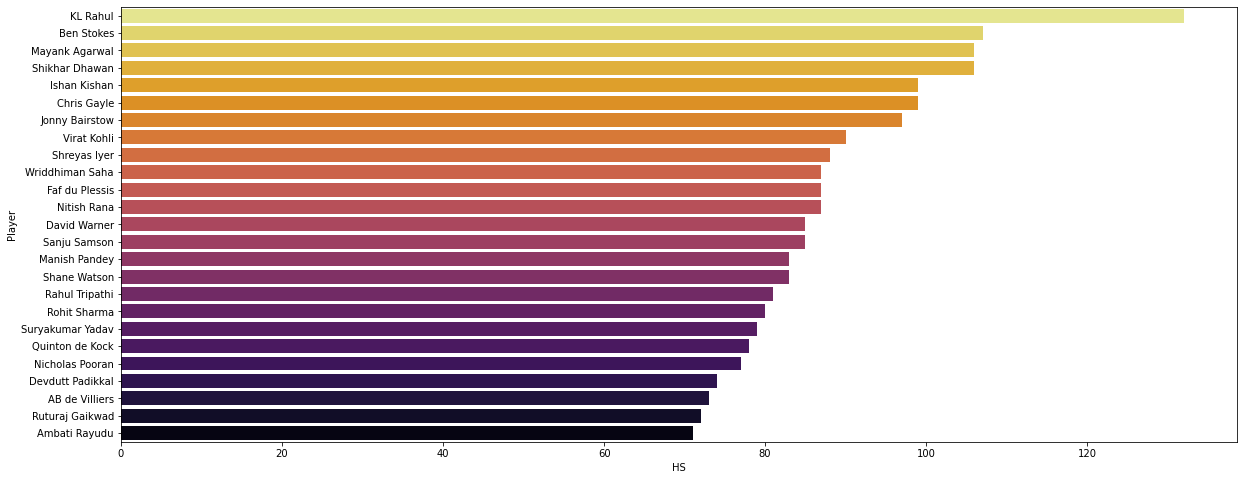

In [33]:
df_most_runs_HS = df_most_runs.loc[:, ["Player", "HS"]]
df_most_runs_HS = df_most_runs_HS.sort_values(by = ['HS'],
                                              ascending = False)

plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs_HS["HS"],
            y = df_most_runs_HS["Player"][:25],
            palette = "inferno_r");


![](https://i.imgur.com/qCiywlL.png)


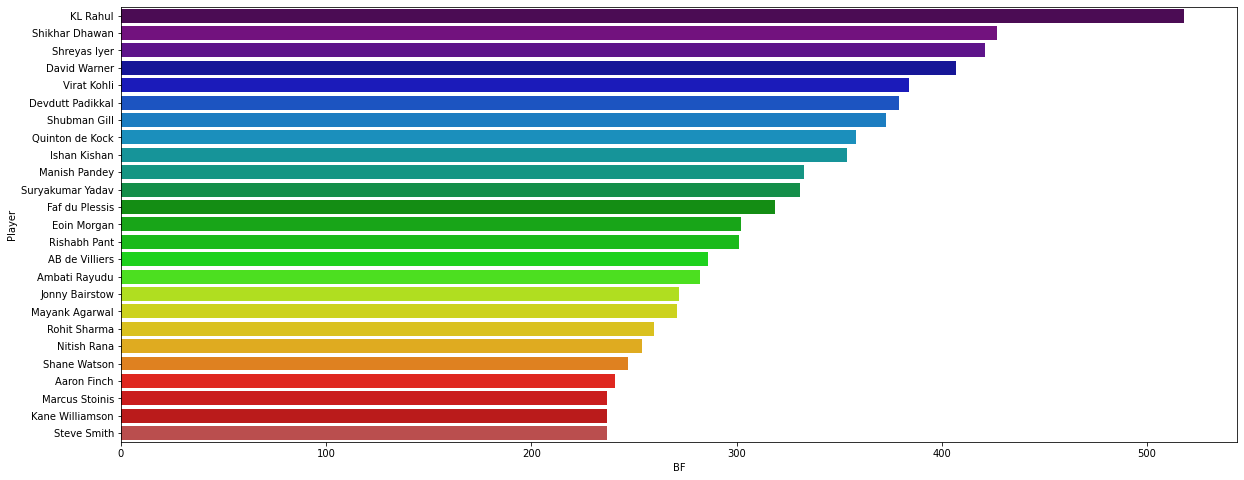

In [34]:
df_most_runs_BF = df_most_runs.loc[:, ["Player", "BF"]]
df_most_runs_BF = df_most_runs_BF.sort_values(by = ['BF'], ascending = False)

plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs_BF["BF"], y = df_most_runs_BF["Player"][:25], palette = "nipy_spectral");


![](https://i.imgur.com/0MROCao.png)


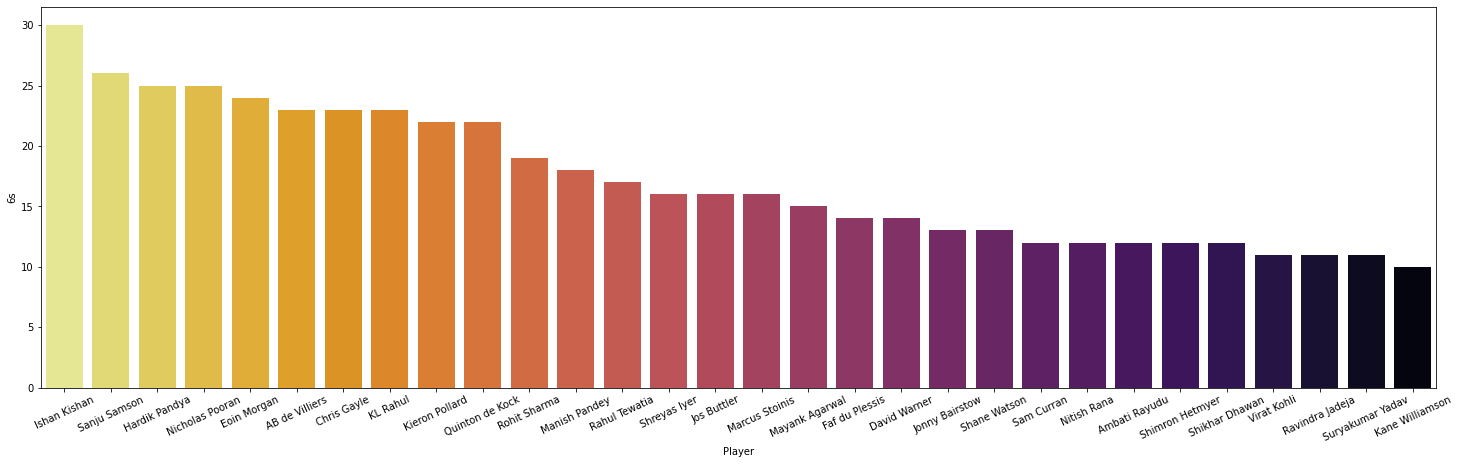

In [35]:
df_most_runs_6s = df_most_runs.loc[:, ["Player", "6s"]]
df_most_runs_6s = df_most_runs_6s.sort_values(by = ['6s'], ascending = False)

plt.figure(figsize = (25, 7))
plt.xticks(rotation = 25)
sns.barplot(x = df_most_runs_6s["Player"][:30], y = df_most_runs_6s["6s"], palette = "inferno_r");


![](https://i.imgur.com/3V9Clv7.png)


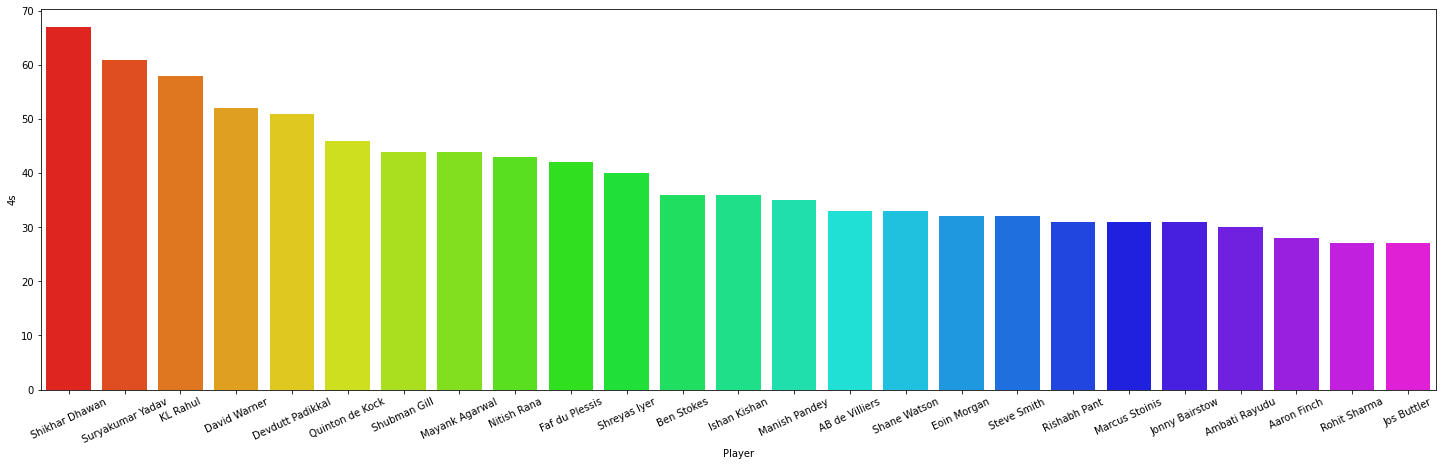

In [36]:
df_most_runs_4s = df_most_runs.loc[:, ["Player", "4s"]]
df_most_runs_4s = df_most_runs_4s.sort_values(by = ['4s'], ascending = False)

plt.figure(figsize = (25, 7))
plt.xticks(rotation = 25)
sns.barplot(x = df_most_runs_4s["Player"][:25], y = df_most_runs_4s["4s"], palette = "gist_rainbow");


![](https://i.imgur.com/bML8sAC.png)


In [37]:
fig = px.scatter(df_most_runs, x = "Runs", y = "BF", color = "Runs")
fig.show()


![](https://i.imgur.com/1IlMnpw.png)


In [38]:
fig = px.scatter(df_most_runs, x = "Runs", y = "SR", color = "Runs")
fig.show()


![](https://i.imgur.com/8aqV8lc.png)


In [39]:
fig = px.scatter(df_most_runs, x = "Runs", y = "Avg", color = "Runs")
fig.show()


![](https://i.imgur.com/BDRWLLN.png)


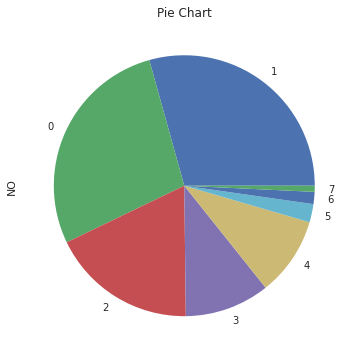

In [40]:
plt.style.use("seaborn")
df_most_runs["NO"].value_counts().plot.pie(figsize = (6, 6))
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()


![](https://i.imgur.com/cSdEXZ0.png)


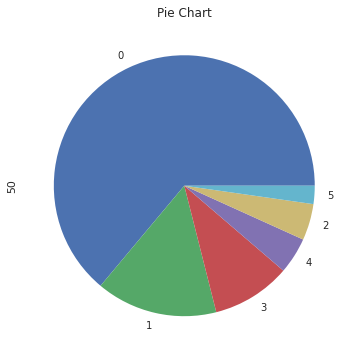

In [41]:
plt.style.use("seaborn")
df_most_runs["50"].value_counts().plot.pie(figsize = (6, 6))
plt.title("Pie Chart")
plt.xticks(rotation = 90)
plt.show()


![](https://i.imgur.com/tFlwsth.png)


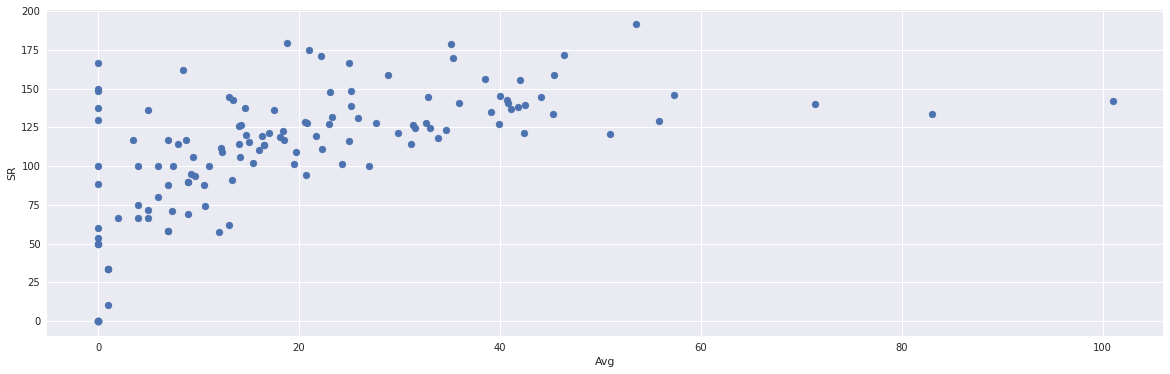

In [42]:
plt.figure(figsize = (20, 6))
plt.scatter(df_most_runs['Avg'], df_most_runs['SR'])
plt.xlabel('Avg')
plt.ylabel('SR')
plt.xticks;

![](https://i.imgur.com/3fWoX65.png)

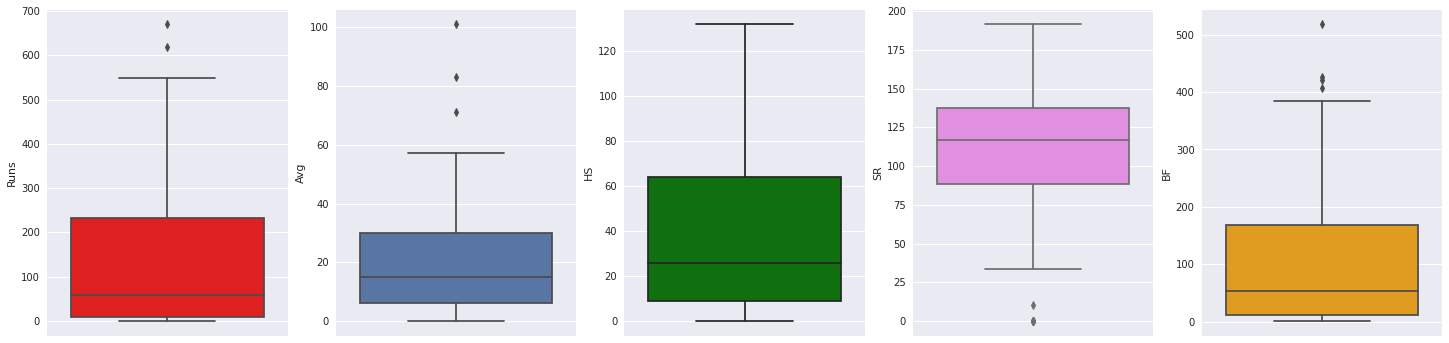

In [43]:
f, axes = plt.subplots(1, 5, figsize = (25, 6))
sns.boxplot(y = df_most_runs["Runs"], orient = 'v', ax = axes[0], color = "red");
sns.boxplot(y = df_most_runs["Avg"], orient = 'v', ax = axes[1]);
sns.boxplot(y = df_most_runs["HS"], orient = 'v', ax = axes[2], color = "green");
sns.boxplot(y = df_most_runs["SR"], orient = 'v', ax = axes[3], color = "violet");
sns.boxplot(y = df_most_runs["BF"], orient = 'v', ax = axes[4], color = "orange");


![](https://i.imgur.com/s0IDsqG.png)


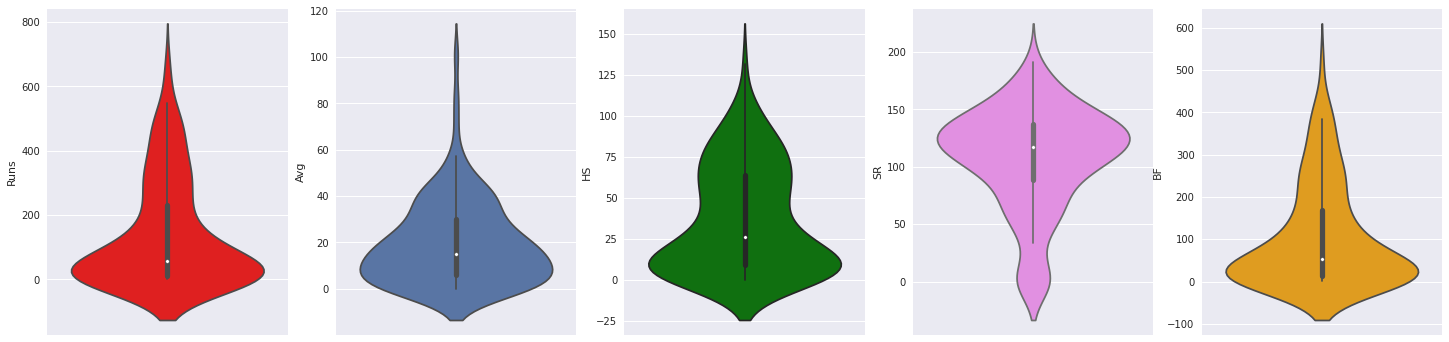

In [44]:
f, axes = plt.subplots(1, 5, figsize = (25, 6))
sns.violinplot(y = df_most_runs["Runs"], orient = 'v', ax = axes[0], color = "red");
sns.violinplot(y = df_most_runs["Avg"], orient = 'v', ax = axes[1]);
sns.violinplot(y = df_most_runs["HS"], orient = 'v', ax = axes[2], color = "green");
sns.violinplot(y = df_most_runs["SR"], orient = 'v', ax = axes[3], color = "violet");
sns.violinplot(y = df_most_runs["BF"], orient = 'v', ax = axes[4], color = "orange");


![](https://i.imgur.com/T4DWf04.png)


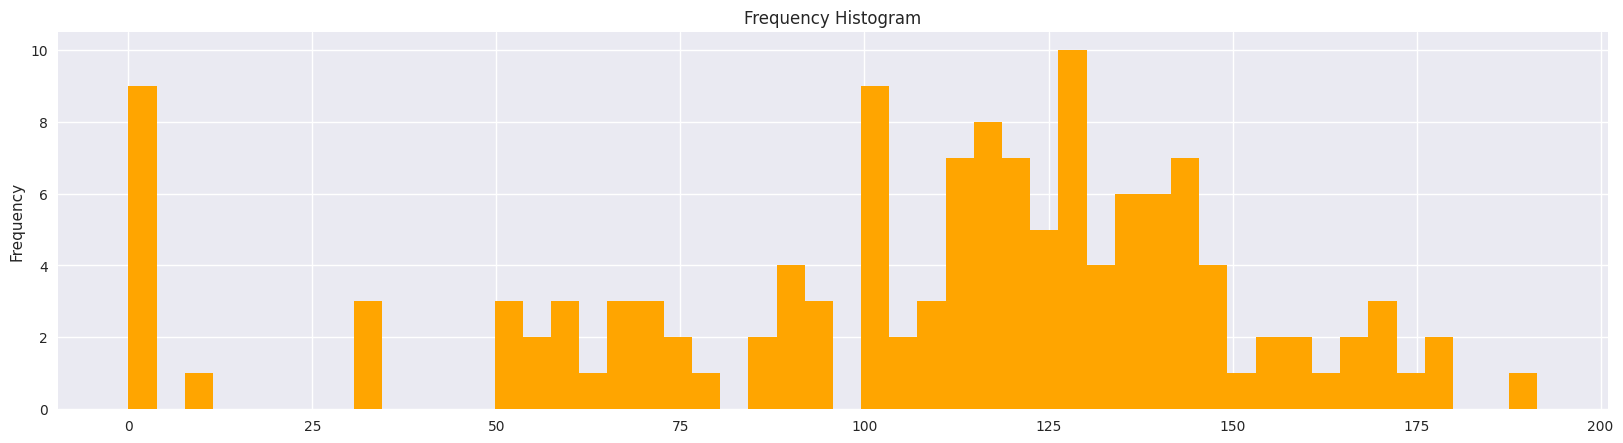

In [45]:
%matplotlib inline
plt.rcParams.update({'figure.figsize':(20,5), 'figure.dpi':100})

kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.hist(df_most_runs["SR"], bins=50, color = "orange")
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

![](https://i.imgur.com/JmKfUwy.png)

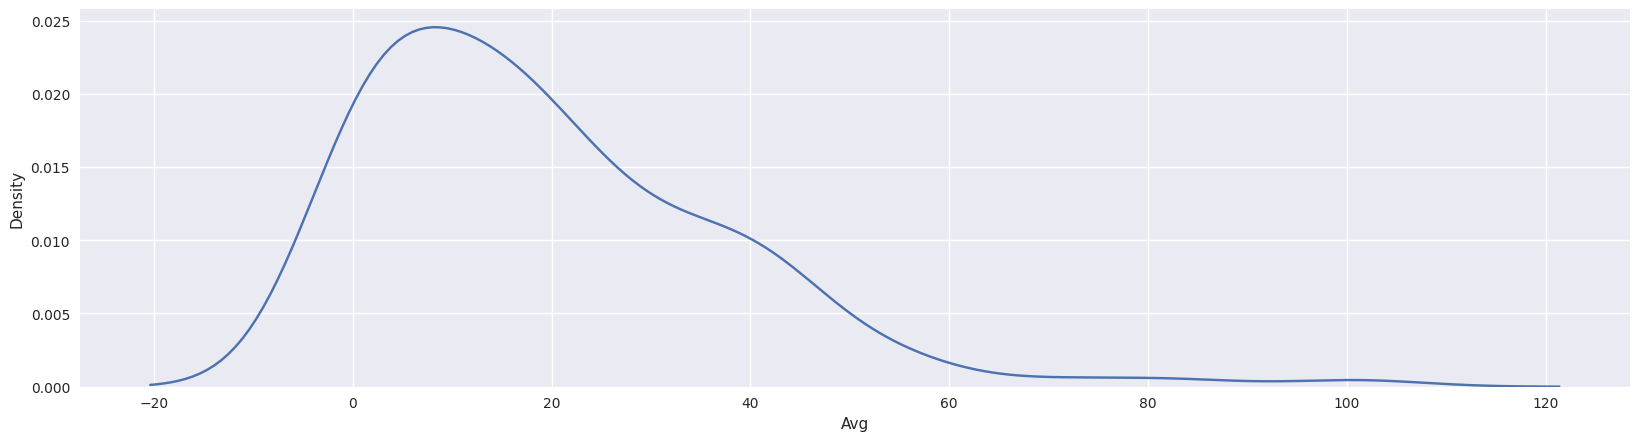

In [46]:
sns.kdeplot(df_most_runs['Avg']);


![](https://i.imgur.com/rHY6z7g.png)


In [47]:
player = []
for i in df_most_runs['Player'][:5]:
    player.append(i)

runs = []
for i in df_most_runs['Runs'][:5]:
    runs.append(i)

fig = make_subplots(rows = 2, cols = 3, specs = [[{"type": "Indicator"},
                                                  {"type": "Indicator"},
                                                  {"type": "Indicator"}],
                                                 [{"type": "Indicator"},
                                                  {"type": "Indicator"},
                                                  {"type": "Indicator"}]])

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[0],
                             title = {'text': player[0],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'},
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 1, col = 1)

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[1],
                             title = {'text': player[1],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'}, 
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 1, col = 3)

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[2],
                             title = {'text': player[2],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'}, 
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 2, col = 1)

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[3],
                             title = {'text': player[3],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'},
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 2, col = 2)

fig.add_trace((go.Indicator(mode = "gauge+number",
                             value = runs[4],
                             title = {'text': player[4],
                                      'font': {'size': 24}},
                             gauge = {'axis': {'range': [None, 1000],
                                               'tickwidth': 1,
                                               'tickcolor': "darkblue"},
                                      'bar': {'color': "black"},
                                      'bgcolor': "yellow",
                                      'borderwidth': 2,
                                      'bordercolor': "black",
                             'steps': [{'range': [0, 250], 'color': 'red'},
                                       {'range': [250, 500], 'color': 'yellow'},
                                       {'range': [500, 750], 'color': 'lightgreen'}, 
                                       {'range': [750, 1000], 'color': 'orange'}]})), row = 2, col = 3)

fig.update_layout(title = {'y':0.73,
                           'x':0.5,
                           'xanchor': 'center',
                           'yanchor': 'top',
                           'font': {'size': 30}})

fig.update_layout(font = {'color': "darkblue",
                          'family': "Times New Roman"},
                  title_text = "Top 5 Run Scorer")

fig.show()

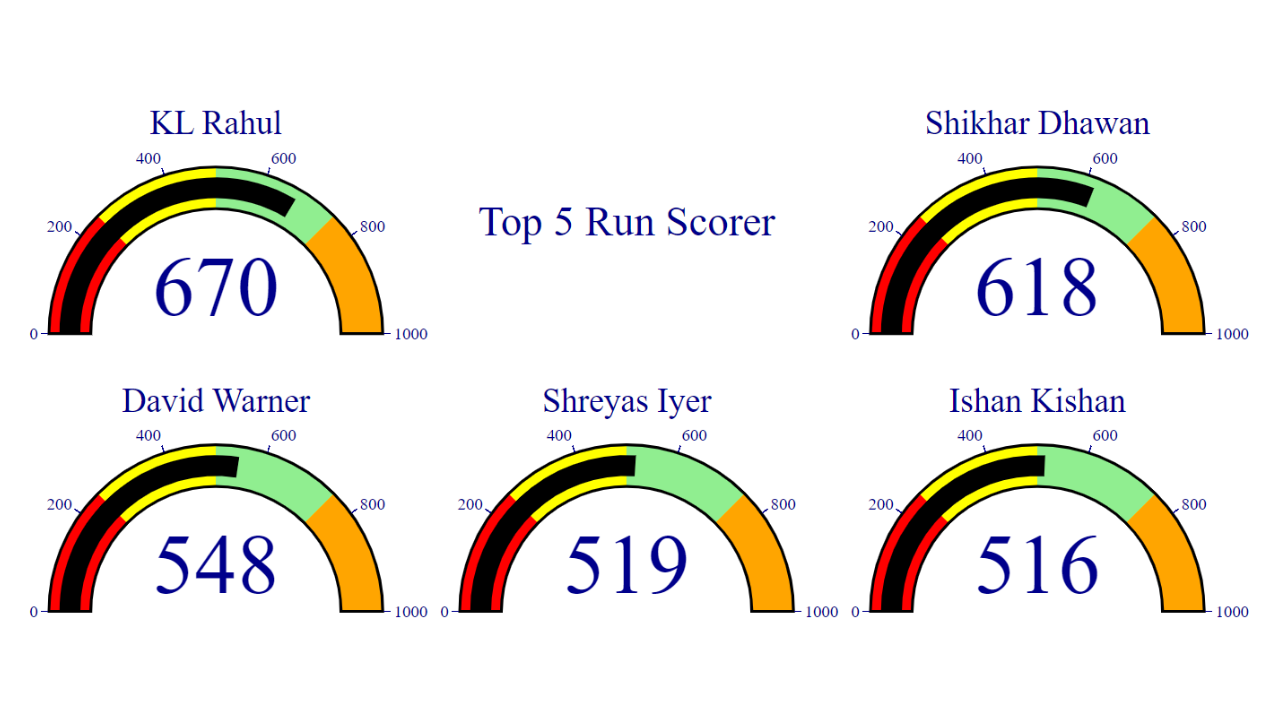

<Figure size 2000x700 with 0 Axes>

In [48]:
plt.figure(figsize = (20, 7))
Image("https://i.imgur.com/cpQIYeF.png")


![](https://i.imgur.com/FVr3SuO.png)


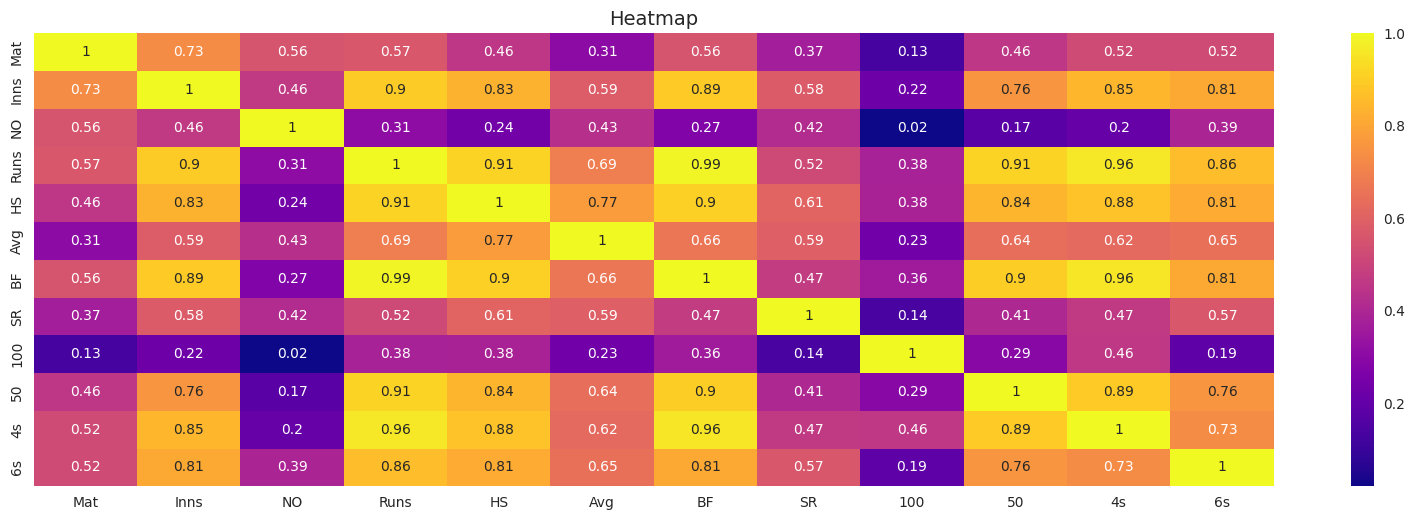

In [49]:
colormap = plt.cm.plasma
temp_df = df_most_runs
corr = temp_df.corr()
plt.figure(figsize = (20, 6))
plt.title('Heatmap', fontsize = 14)
sns.heatmap(corr, cmap = colormap, linecolor = 'white', annot = True);


![](https://i.imgur.com/QgnG08f.png)


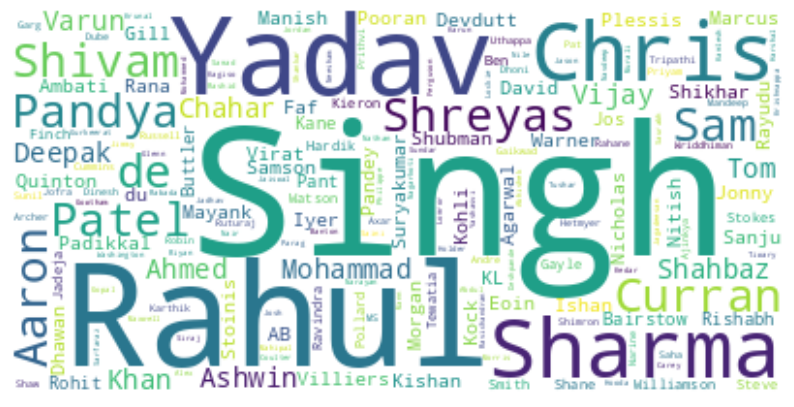

In [50]:
text = " ".join(Player for Player in df_most_runs.Player)
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
plt.figure(figsize = (10, 6))
plt.imshow(word_cloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()


![](https://i.imgur.com/RB9taP1.png)


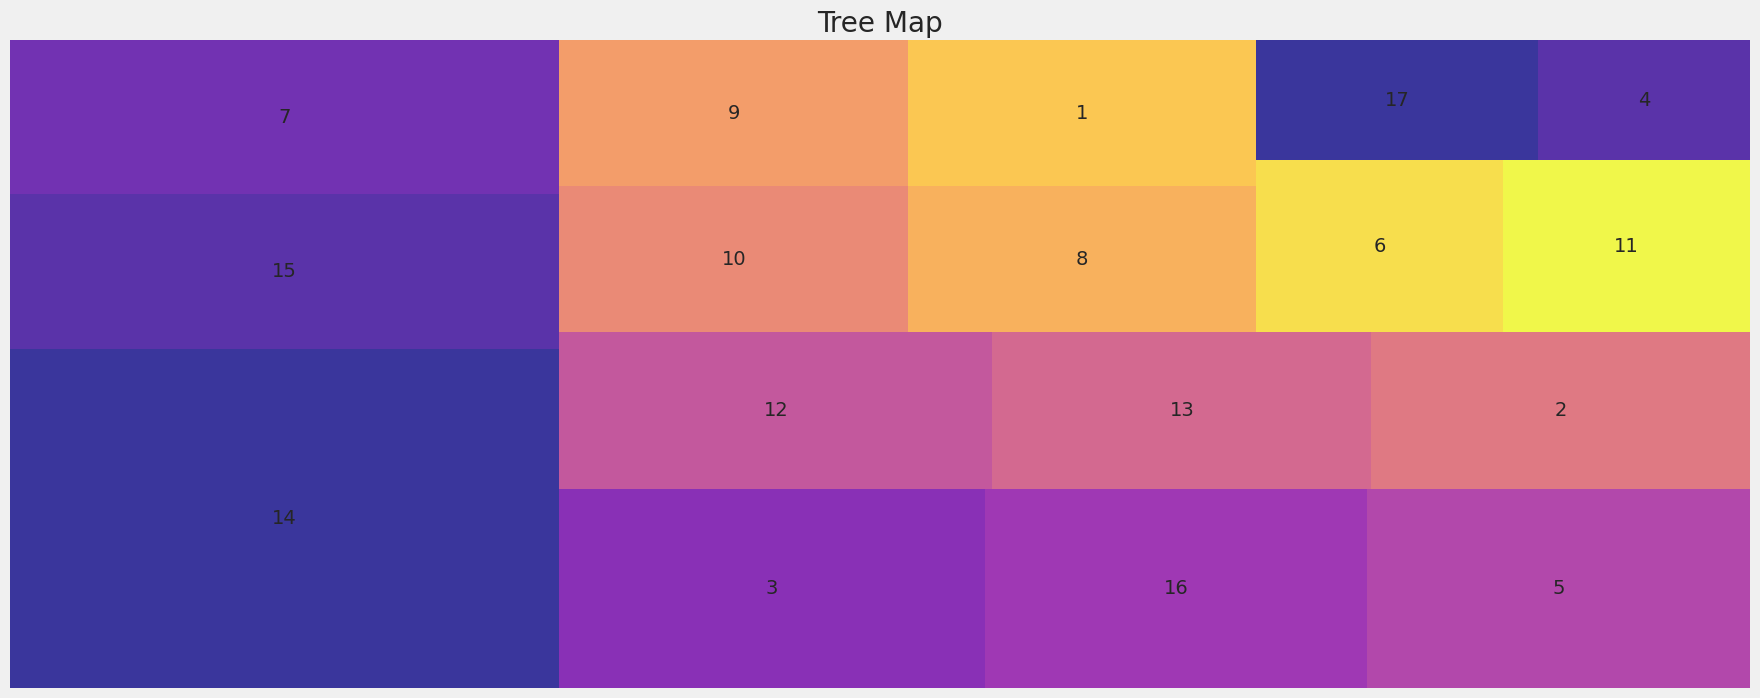

In [51]:
y = df_most_runs["Mat"].value_counts()
plt.rcParams["figure.figsize"] = (20, 8)
plt.style.use("fivethirtyeight")
color = plt.cm.plasma(np.linspace(0, 1, 15))
squarify.plot(sizes = y.values,
              label = y.index,
              alpha = 0.8,
              color = color)
plt.title("Tree Map")
plt.axis("off")
plt.show()

### **P.S - This Notebook is only a Subset of the whole Analysis I have done on this Dataset. This EDA only contains the Total Runs in 2020 of a IPL season. There are 12 different csv files with different features like Most Wickets, Best Bowling Economy (Innings), Best Bowling Strike Rate (Innings), Fastest Centuries, Fastest Fifties, Most Runs Conceded (Innings), Most Dot Balls (Innings), Most Runs (Over), Most Sixes (Innings), Most Runs (Over), Most Fours (Innings) all having records from 2008 to 2021, so you can just imagine how much EDA we can do with these all csv's and can ain insights from it. In the future, I will continue to add other csv files with different features and merge them with this notebook.**